In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import matplotlib.pyplot as plt
import os
import glob

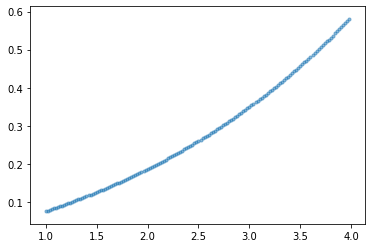

In [2]:
def random_floats(low, high, size):
    return [np.random.uniform(low, high) for _ in range(size)]

size = 10000

X = random_floats(0, 1, size)

nu_list = []
[nu_list.append(np.log(0.65)) if i<=0.017 else nu_list.append(0) for i in X]

nu = np.array(nu_list).reshape(-1,1) 
ep = np.random.normal(0, 1, size).reshape(-1,1)

log_g = 0.02+0.02*ep+nu
g = np.exp(log_g)
g_list = g.tolist

#Part 1: Hansen–Jagannathan Bound
M_list = []
gamma_list = []

for i in np.arange(1,4,0.02):    
    M = 0.99*g**-i
    M_list.append(M)
    gamma_list.append(i)
    
M = np.array(M_list)
gamma = np.array(gamma_list)

#print(g)
#print(M_list) 
#print(M)
#print(np.std(M, axis = 1, ddof = 1))
#print(np.mean(M, axis = 1))

SD_over_mean = np.std(M, axis = 1, ddof = 1)/np.mean(M, axis = 1)

#print(SD_over_mean.T)
#print(gamma)

df= pd.concat([pd.DataFrame(gamma),pd.DataFrame(SD_over_mean)], axis=1)
df.columns= "Gamma","SD(M)/E(M)"
df.to_excel('Gamma_SD_M.xlsx')

plt.scatter(gamma , SD_over_mean.T, s=np.pi*3, alpha=0.5)


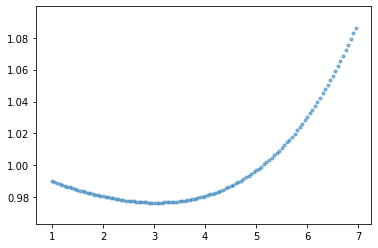

In [3]:
#Part 2: Price-Dividend Ratio

M_list2 = []
gamma_list2 = []

for i in np.arange(1,7,0.05):    
    M2 = 0.99*g**(1-i)
    M_list2.append(M2)
    gamma_list2.append(i)

#print(M_list2)
#print(gamma_list2)

P1_D = np.mean(np.array(M_list2), axis = 1)
plt.scatter(gamma_list2 ,P1_D, s=np.pi*3, alpha=0.5)

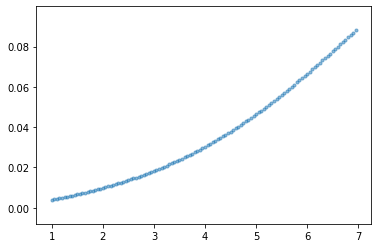

In [4]:
#Part 3: Equity Premium

M_list3 = []
gamma_list3 = []

for i in np.arange(1,7,0.05):    
    M3 = (0.99*g**(-i))
    M_list3.append(M3)
    gamma_list3.append(i)
    
M3 = np.array(M_list3)
Rf = 1/(np.mean(M3, axis = 1))

Rm = np.reciprocal(P1_D)*g.mean()
equity_premium = Rm-Rf

plt.scatter(gamma_list3 ,equity_premium, s=np.pi*3, alpha=0.5)